# Protected Areas
Total reef area according to level of protection: unprotected area, marine protected area, fully or highly protected area. Disaggregated by GCRMN region or by country/territory.

_Author: Peter Kerins_  
_Created: 11 May 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Horizontal bar chart
- Value is reef area at each protection level
- Single stacked bar per region (for global version)

## Data
GCRMN Region data: [ocn.calcs.008a Coral Reefs in Protected and No-Take Areas by GCRMN Region](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_008a_reefs_mpa_notake_gcrmn)  
Country/Territory data: [ocn.calcs.008b Coral Reefs in Protected and No-Take Areas by Country/Territory](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_008b_reefs_mpa_notake_territory)  

- [Global Distribution of Coral Reefs](https://data.unep-wcmc.org/datasets/1) from WCMC ([bio.004.rw2 Coral Reef Locations](https://resourcewatch.carto.com/u/wri-rw/tables/bio_004a_coral_reef_locations_edit/))    
- [Marine Protected Areas](https://www.protectedplanet.net/en/thematic-areas/marine-protected-areas) from WDPA (bio.007b.rw0.nrt Marine Protected Areas [polygons](https://resourcewatch.carto.com/u/rw-nrt/dataset/bio_007b_rw0_marine_protected_area_polygon_edit) & [points](https://resourcewatch.carto.com/u/rw-nrt/dataset/bio_007b_rw0_marine_protected_area_point_edit))  
- [No-Take Zones](https://mpatlas.org/) from MPAtlas ([ocn.018.rw0.nrt Fully and Highly Protected Marine Areas](https://resourcewatch.carto.com/u/rw-nrt/dataset/ocn_018_fully_highly_protected_marine_areas))  

## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Original
Made prior to the availability of no-take zone data. Disaggregated by country.  
[ocn.calcs.005 Reef Area Inside and Outside MPAs](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_005_reef_area_inside_outside_mpas)  

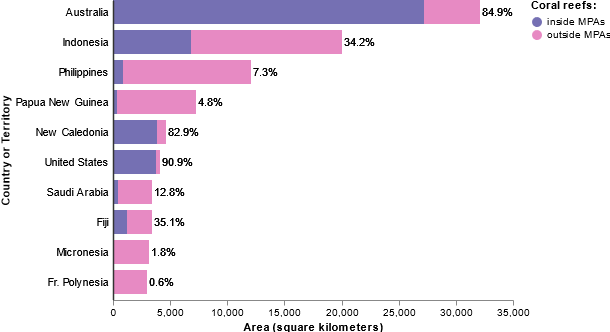

In [4]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@cell:mouseover",
          "update": "datum"
        },
        {
          "events": "@cell:mouseout",
          "update": "null"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT country, status, status_area, fraction_inside, total_area FROM ocn_calcs_005_reef_area_inside_outside_mpas WHERE country IN ('Australia','Indonesia','Philippines','Papua New Guinea','New Caledonia','United States','Saudi Arabia','Fiji','Micronesia','Fr. Polynesia') ORDER BY total_area DESC, status ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "stack",
          "groupby": [
            "country"
          ],
          "field": "status_area",
          "sort": {
            "field": [
              "status"
            ],
            "order": [
              "ascending"
            ]
          },
          "as": [
            "x0",
            "x1"
          ]
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "yscale",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "country"
      },
      "range": "height",
      "padding": 0
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": {
        "data": "table",
        "field": "total_area"
      },
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "status"
      },
      "range": [
        "#7570b3",
        "#e78ac3"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Country or Territory",
      "tickSize": 0,
      "labelPadding": 5,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {
              "signal": "datum.value"
            },
            "fill": {
              "value": "black"
            },
            "angle": {
              "value": 0
            },
            "align": {
              "value": "right"
            },
            "fontSize": {
              "value": "11"
            },
            "baseline": {
              "value": "middle"
            },
            "dy": {
              "value": -2
            },
            "dx": {
              "value": 0
            }
          },
          "hover": {
            "fill": {
              "value": "firebrick"
            }
          }
        },
        "domain": {
          "update": {
            "stroke": {
              "value": "#333"
            },
            "strokeWidth": {
              "value": 1.5
            }
          }
        }
      }
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "title": "Area (square kilometers)",
      "labelOverlap": true
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "y": {
            "scale": "yscale",
            "field": "country"
          },
          "height": {
            "scale": "yscale",
            "band": 1,
            "offset": -6
          },
          "x": {
            "scale": "xscale",
            "field": "x0"
          },
          "x2": {
            "scale": "xscale",
            "field": "x1"
          },
          "fill": {
            "scale": "color",
            "field": "status"
          },
          "tooltip": {
            "signal": "{'Country/Territory':datum.country,'Status':upper(slice(datum.status,0,1))+slice(datum.status,1),'Area':format(round(datum.status_area),',')+ ' sq. km'}"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          }
        }
      }
    },
    {
      "type": "text",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "total_area",
            "offset": 2
          },
          "y": {
            "scale": "yscale",
            "field": "country",
            "offset": 7
          },
          "align": {
            "value": ""
          },
          "baseline": {
            "value": "top"
          },
          "text": {
            "signal": "format(datum.fraction_inside, '.1%')"
          },
          "tooltip": {
            "signal": "'Reefs within national waters inside MPAs'"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": [
        "Coral reefs:"
      ],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

---

# GCRMN Regions

## Global

### Query
```sql
SELECT gcrmn_reg, 'Unprotected' as area_type, area_unprotected AS area_value, area_total, area_unprotected/area_total AS area_fraction
FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn
UNION ALL
SELECT gcrmn_reg, 'Protected' as area_type, area_mpa_only AS area_value, area_total, area_mpa_only/area_total AS area_fraction
FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn
UNION ALL
SELECT gcrmn_reg, 'Fully/Highly Protected' as area_type, area_notake AS area_value, area_total, area_notake/area_total AS area_fraction
FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn
ORDER BY gcrmn_reg ASC, area_type ASC
```

### Specification

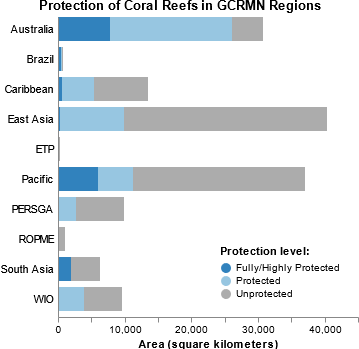

In [5]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gcrmn_reg, 'Unprotected' as area_type, area_unprotected AS area_value, area_total, area_unprotected/area_total AS area_fraction FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn UNION ALL SELECT gcrmn_reg, 'Protected' as area_type, area_mpa_only AS area_value, area_total, area_mpa_only/area_total AS area_fraction FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn UNION ALL SELECT gcrmn_reg, 'Fully/Highly Protected' as area_type, area_notake AS area_value, area_total, area_notake/area_total AS area_fraction FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn ORDER BY gcrmn_reg ASC, area_type ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "stack",
          "groupby": [
            "gcrmn_reg"
          ],
          "field": "area_value",
          "as": [
            "x0",
            "x1"
          ]
        },
        {
          "type": "formula",
          "expr": "if(datum.area_type=='Unprotected','(Outside of MPA)', if(datum.area_type=='Protected','(Other MPA)', '(No-Take Area)'))",
          "as": "suffix"
        }
      ]
    }
  ],
  "title": "Protection of Coral Reefs in GCRMN Regions",
  "scales": [
    {
      "name": "yscale",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "gcrmn_reg"
      },
      "range": "height",
      "padding": 0
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": {
        "data": "table",
        "field": "area_total"
      },
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "area_type"
      },
      "range": [
        "#3182bd",
        "#97c6e1",
        "#acacac"
      ]
    }
  ],
  "axes": [{
      "orient": "left",
      "scale": "yscale",
      "tickSize": 0,
      "labelPadding": 5,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {
              "signal": "datum.value"
            },
            "fill": {
              "value": "black"
            },
            "angle": {
              "value": 0
            },
            "align": {
              "value": "right"
            },
            "fontSize": {
              "value": "11"
            },
            "baseline": {
              "value": "middle"
            },
            "dy": {
              "value": -2
            },
            "dx": {
              "value": 0
            }
          },
          "hover": {
            "fill": {
              "value": "firebrick"
            }
          }
        }
      }
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "title": "Area (square kilometers)",
      "labelOverlap": "greedy",
      "labelSeparation": 20
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "y": {
            "scale": "yscale",
            "field": "gcrmn_reg"
          },
          "height": {
            "scale": "yscale",
            "band": 1,
            "offset": -6
          },
          "x": {
            "scale": "xscale",
            "field": "x0"
          },
          "x2": {
            "scale": "xscale",
            "field": "x1"
          },
          "fill": {
            "scale": "color",
            "field": "area_type"
          },
          "tooltip": {
            "signal": "{title:datum.area_type+' '+datum.suffix,'Region':datum.gcrmn_reg,'Proportion':format(datum.area_fraction, '.1%')}"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          },
          "fill": {
            "scale": "color",
            "field": "area_type"
          }
        },
        "hover": {
          "fill": {
            "value": "#ddaa99"
          }
        }
      }
    },
    {
      "type": "text",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "total_area",
            "offset": 2
          },
          "y": {
            "scale": "yscale",
            "field": "country",
            "offset": 7
          },
          "align": {
            "value": ""
          },
          "baseline": {
            "value": "top"
          },
          "text": {
            "signal": ""
          },
          "tooltip": {
            "signal": "'Reefs within national waters inside MPAs'"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": [
        "Protection level:"
      ],
      "fill": "color",
      "orient": "bottom-right",
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "fill": {
              "value": "#000000"
            }
          },
          "hover": {
            "fill": {
              "value": "#ddaa99"
            }
          }
        }
      }
    }
  ]
}
""")
vegaview=dict(spec)
Vega(vegaview)

## Regional

### Query
Note that regional filtering happens within widget via transform
```sql
SELECT gcrmn_reg, 'Unprotected' as area_type, area_unprotected AS area_value, area_total, area_unprotected/area_total AS area_fraction
FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn
UNION ALL
SELECT gcrmn_reg, 'Protected' as area_type, area_mpa_only AS area_value, area_total, area_mpa_only/area_total AS area_fraction
FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn
UNION ALL
SELECT gcrmn_reg, 'Fully/Highly Protected' as area_type, area_notake AS area_value, area_total, area_notake/area_total AS area_fraction
FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn
ORDER BY gcrmn_reg ASC, area_type ASC
```

### Specification

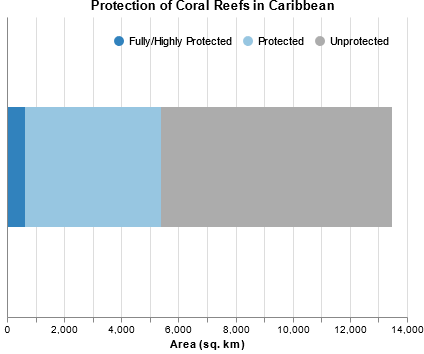

In [6]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "padding": {
    "left": 2, 
    "top": 0, 
    "right": 0, 
    "bottom": 5
  },
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "bind": {
        "input": "select",
        "options": [
          "Australia",
          "Brazil",
          "Caribbean",
          "East Asia",
          "ETP",
          "Pacific",
          "PERSGA",
          "ROPME",
          "South Asia",
          "WIO"
        ],
        "name": "GCRMN Region "
      },
      "value": "Caribbean"
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gcrmn_reg, 'Unprotected' as area_type, area_unprotected AS area_value, area_total, area_unprotected/area_total AS area_fraction FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn UNION ALL SELECT gcrmn_reg, 'Protected' as area_type, area_mpa_only AS area_value, area_total, area_mpa_only/area_total AS area_fraction FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn UNION ALL SELECT gcrmn_reg, 'Fully/Highly Protected' as area_type, area_notake AS area_value, area_total, area_notake/area_total AS area_fraction FROM ocn_calcs_008a_reefs_mpa_notake_gcrmn ORDER BY gcrmn_reg ASC, area_type ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "filter",
          "expr": "datum.gcrmn_reg==region_name"
        },
        {
          "type": "stack",
          "groupby": [
            "gcrmn_reg"
          ],
          "field": "area_value",
          "as": [
            "x0",
            "x1"
          ]
        },
        {
          "type": "formula",
          "expr": "if(datum.area_type=='Unprotected','(Outside of MPA)', if(datum.area_type=='Protected','(Other MPA)', '(No-Take Area)'))",
          "as": "suffix"
        }
      ]
    }
  ],
  "title": {
    "text": 
      {"signal": "'Protection of Coral Reefs in '+region_name"}
  },
  "scales": [
    {
      "name": "yscale",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "gcrmn_reg"
      },
      "range": "height",
      "padding": 0
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": {
        "data": "table",
        "field": "area_total"
      },
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "area_type"
      },
      "range": [
        "#3182bd",
        "#97c6e1",
        "#acacac"
      ]
    }
  ],
  "axes": [{
      "orient": "left",
      "scale": "yscale",
      "tickSize": 0,
      "labelPadding": 5,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {
              "signal": ""
            },
            "fill": {
              "value": "black"
            },
            "angle": {
              "value": 0
            },
            "align": {
              "value": "right"
            },
            "fontSize": {
              "value": "11"
            },
            "baseline": {
              "value": "middle"
            },
            "dy": {
              "value": -2
            },
            "dx": {
              "value": 0
            }
          },
          "hover": {
            "fill": {
              "value": "firebrick"
            }
          }
        }
      }
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "title": "Area (sq. km)",
      "labelOverlap": "greedy",
      "grid": true,
      "labelSeparation": 20
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "yc": {
            "signal": "height/2"
          },
          "height": {
            "signal": "2*height/5"
          },
          "x": {
            "scale": "xscale",
            "field": "x0"
          },
          "x2": {
            "scale": "xscale",
            "field": "x1"
          },
          "tooltip": {
            "signal": "{title:datum.area_type+' '+datum.suffix,'Region':datum.gcrmn_reg,'Proportion':format(datum.area_fraction, '.1%')}"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          },
          "fill": {
            "scale": "color",
            "field": "area_type"
          }
        },
        "hover": {
          "fill": {
            "value": "#ddaa99"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "fill": "color",
      "direction": "horizontal",
      "orient": "top-right",
      "labelBaseline": "middle",
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "fill": {
              "value": "#000000"
            },
            "fontSize": {
              "value": "11"
            },
            "dy": {
              "value": 1
            }
          },
          "hover": {
            "fill": {
              "value": "#ddaa99"
            }
          }
        }
      }
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

### RW API
Parent dataset [ocn.018.rw0.nrt Fully and Highly Protected Marine Areas](https://resourcewatch.org/data/explore/ocn018-Fully-and-Highly-Protected-Marine-Areas) ([Admin](https://resourcewatch.org/admin/data/datasets/4429cf8f-7537-485f-b98a-5e67c56290b9))    
[API](https://api.resourcewatch.org/v1/dataset/4429cf8f-7537-485f-b98a-5e67c56290b9/) `4429cf8f-7537-485f-b98a-5e67c56290b9`  
[Widgets](https://api.resourcewatch.org/v1/dataset/4429cf8f-7537-485f-b98a-5e67c56290b9/widget)

Lightly modified version of widget passed to API via [widget scripts](https://github.com/resource-watch/data-team-tools/tree/master/advanced_widget_writer). Key variables to modify in script, besides specification itself:

In [7]:
dataset_id = '4429cf8f-7537-485f-b98a-5e67c56290b9'
name = 'Protection of Coral Reefs in <GCRMN Region>'
description = 'Proportion of coral reef area afforded different levels of protection by GCRMN region'

- [Australia](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [Brazil](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [Caribbean](https://api.resourcewatch.org/v1/widget/e783d823-8ab2-4244-8d01-52582c557970?env=production)  `e783d823-8ab2-4244-8d01-52582c557970`  
- [East Asia](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [ETP](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [Pacific](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [PERSGA](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [ROPME](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [South Asia](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [WIO](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
  
- [Select Region](https://api.resourcewatch.org/v1/widget/d92681cf-332b-4b62-bf86-79d77898570a?env=production) `d92681cf-332b-4b62-bf86-79d77898570a`  

---

# Specifications - Country/Territory

## Global

### Query
```sql
SELECT iso3, first_territory AS name, 'Unprotected' AS area_type, area_unprotected AS area_value, area_total, area_unprotected/area_total AS area_fraction
FROM ocn_calcs_008b_reefs_mpa_notake_territory
WHERE iso3 != 'HKG'
UNION ALL
SELECT iso3, first_territory AS name, 'Protected' AS area_type, area_mpa_only AS area_value, area_total, area_mpa_only/area_total AS area_fraction
FROM ocn_calcs_008b_reefs_mpa_notake_territory
WHERE iso3 != 'HKG'
UNION ALL
SELECT iso3, first_territory AS name, 'Fully/Highly Protected' AS area_type, area_notake AS area_value, area_total, area_notake/area_total AS area_fraction
FROM ocn_calcs_008b_reefs_mpa_notake_territory
WHERE iso3 != 'HKG'
ORDER BY area_total DESC, area_type ASC
LIMIT 30
```

### Specification

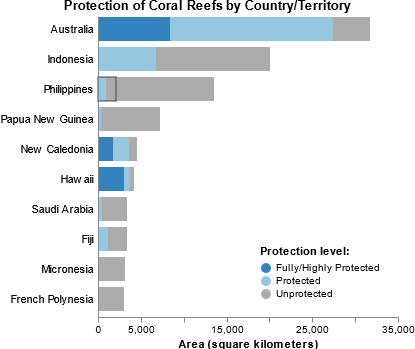

In [10]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT iso3, first_territory AS name, 'Unprotected' AS area_type, area_unprotected AS area_value, area_total, area_unprotected/area_total AS area_fraction FROM ocn_calcs_008b_reefs_mpa_notake_territory WHERE iso3 != 'HKG' UNION ALL SELECT iso3, first_territory AS name, 'Protected' AS area_type, area_mpa_only AS area_value, area_total, area_mpa_only/area_total AS area_fraction FROM ocn_calcs_008b_reefs_mpa_notake_territory WHERE iso3 != 'HKG' UNION ALL SELECT iso3, first_territory AS name, 'Fully/Highly Protected' AS area_type, area_notake AS area_value, area_total, area_notake/area_total AS area_fraction FROM ocn_calcs_008b_reefs_mpa_notake_territory WHERE iso3 != 'HKG' ORDER BY area_total DESC, area_type ASC LIMIT 30",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "stack",
          "groupby": [
            "iso3"
          ],
          "field": "area_value",
          "as": [
            "x0",
            "x1"
          ]
        },
        {
          "type": "formula",
          "expr": "if(datum.area_type=='Unprotected','(Outside of MPA)', if(datum.area_type=='Protected','(Other MPA)', '(No-Take Area)'))",
          "as": "suffix"
        }
      ]
    },
    {
      "name": "phl_extra",
      "values": [
        {
          "iso3": "PHL", 
          "name": "Philippines",
          "area_type": "Protected",
          "area_value": 2129.687023517,
          "area_total": 13487.56823,
          "area_fraction": 0.1579,
          "suffix": "(Other MPA)"
        }
      ]
    }
  ],
  "title": "Protection of Coral Reefs by Country/Territory",
  "scales": [
    {
      "name": "yscale",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "name"
      },
      "range": "height",
      "padding": 0
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": {
        "data": "table",
        "field": "area_total"
      },
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "area_type"
      },
      "range": [
        "#3182bd",
        "#97c6e1",
        "#acacac"
      ]
    }
  ],
  "axes": [{
      "orient": "left",
      "scale": "yscale",
      "tickSize": 0,
      "labelPadding": 5,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {
              "signal": "datum.value"
            },
            "fill": {
              "value": "black"
            },
            "angle": {
              "value": 0
            },
            "align": {
              "value": "right"
            },
            "fontSize": {
              "value": "11"
            },
            "baseline": {
              "value": "middle"
            },
            "dy": {
              "value": -2
            },
            "dx": {
              "value": 0
            }
          },
          "hover": {
            "fill": {
              "value": "firebrick"
            }
          }
        }
      }
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "title": "Area (square kilometers)",
      "labelOverlap": "greedy",
      "labelSeparation": 20
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "y": {
            "scale": "yscale",
            "field": "name"
          },
          "height": {
            "scale": "yscale",
            "band": 1,
            "offset": -6
          },
          "x": {
            "scale": "xscale",
            "field": "x0"
          },
          "x2": {
            "scale": "xscale",
            "field": "x1"
          },
          "fill": {
            "scale": "color",
            "field": "area_type"
          },
          "tooltip": {
            "signal": "{title:datum.area_type+' '+datum.suffix,'Country/Territory':datum.name,'Proportion':format(datum.area_fraction, '.1%')}"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          },
          "fill": {
            "scale": "color",
            "field": "area_type"
          }
        },
        "hover": {
          "fill": {
            "value": "#ddaa99"
          }
        }
      }
    },
    {
      "type": "rect",
      "from": {
        "data": "phl_extra"
      },
      "encode": {
        "enter": {
          "y": {
            "scale": "yscale",
            "field": "name"
          },
          "height": {
            "scale": "yscale",
            "band": 1,
            "offset": -6
          },
          "x": {
            "scale": "xscale",
            "value": 0
          },
          "x2": {
            "scale": "xscale",
            "field": "area_value"
          },
          "fill": {
            "value": "black"
          },
          "fillOpacity": {
            "value": 0
          },
          "stroke": {
            "value": "#444444"
          },
          "strokeWidth": {
            "value": "1"
          },
          "strokeOpacity": {
            "value": "1"
          },
          "strokeDash": {
            "value": [
              [3,3]
            ]
          },
          "tooltip": {
            "signal": "{title:datum.area_type+' '+datum.suffix,'Country/Territory':datum.name,'Proportion (WDPA)':format(0.0717103210383537, '.1%'),'Proportion (Ocean+ Habitat)':format(datum.area_fraction, '.1%')}"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 0
          },
          "fill": {
            "value": "black"
          }
        },
        "hover": {
          "fill": {
            "value": "#ffaa99"
          },
          "fillOpacity": {
            "value": 0.5
          }
        }
      }
    },
    {
      "type": "text",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "total_area",
            "offset": 2
          },
          "y": {
            "scale": "yscale",
            "field": "name",
            "offset": 7
          },
          "align": {
            "value": ""
          },
          "baseline": {
            "value": "top"
          },
          "text": {
            "signal": ""
          },
          "tooltip": {
            "signal": "'Coral reef area within national waters'"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": [
        "Protection level:"
      ],
      "fill": "color",
      "orient": "bottom-right",
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "fill": {
              "value": "#000000"
            }
          },
          "hover": {
            "fill": {
              "value": "#ddaa99"
            }
          }
        }
      }
    }
  ]
}
""")
vegaview=dict(spec)
Vega(vegaview)

### RW API
Parent dataset [ocn.018.rw0.nrt Fully and Highly Protected Marine Areas](https://resourcewatch.org/data/explore/ocn018-Fully-and-Highly-Protected-Marine-Areas) ([Admin](https://resourcewatch.org/admin/data/datasets/4429cf8f-7537-485f-b98a-5e67c56290b9))    
[API](https://api.resourcewatch.org/v1/dataset/4429cf8f-7537-485f-b98a-5e67c56290b9/) `4429cf8f-7537-485f-b98a-5e67c56290b9`  
[Widgets](https://api.resourcewatch.org/v1/dataset/4429cf8f-7537-485f-b98a-5e67c56290b9/widget)

Lightly modified version of widget passed to API via [widget scripts](https://github.com/resource-watch/data-team-tools/tree/master/advanced_widget_writer). Key variables to modify in script, besides specification itself:

In [2]:
dataset_id = '4429cf8f-7537-485f-b98a-5e67c56290b9'
name = 'Protection of Coral Reefs by Country/Territory'
description = 'Proportion of coral reef area afforded different levels of protection in major coral countries/territories'

- [Major Countries/Territories](https://api.resourcewatch.org/v1/widget/be3cf170-33e1-427e-813e-cbdb95c52c88?env=production) `be3cf170-33e1-427e-813e-cbdb95c52c88`  

## Regional - Country/Territory

### Query
```sql
SELECT iso3, first_territory AS name, 'Unprotected' AS area_type, area_unprotected AS area_value, area_total, area_unprotected/area_total AS area_fraction
FROM ocn_calcs_008b_reefs_mpa_notake_territory
WHERE iso3 != 'HKG'
UNION ALL
SELECT iso3, first_territory AS name, 'Protected' AS area_type, area_mpa_only AS area_value, area_total, area_mpa_only/area_total AS area_fraction
FROM ocn_calcs_008b_reefs_mpa_notake_territory
WHERE iso3 != 'HKG'
UNION ALL
SELECT iso3, first_territory AS name, 'Fully/Highly Protected' AS area_type, area_notake AS area_value, area_total, area_notake/area_total AS area_fraction
FROM ocn_calcs_008b_reefs_mpa_notake_territory
WHERE iso3 != 'HKG'
ORDER BY area_total DESC, area_type ASC
LIMIT 30
```

### Specification

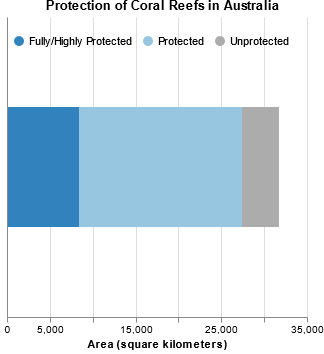

In [8]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "padding": {
    "left": 2, 
    "top": 0, 
    "right": 0, 
    "bottom": 5
  },
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "territory_name",
      "description": "Name of country/territory",
      "bind": {
        "input": "select",
        "options": [
          "Australia",
          "Indonesia",
          "Philippines",
          "Papua New Guinea",
          "New Caledonia",
          "Hawaii",
          "Saudi Arabia",
          "Fiji",
          "Micronesia",
          "French Polynesia"
        ],
        "name": "Country/Territory"
      },
      "value": "Australia"
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT iso3, first_territory AS name, 'Unprotected' AS area_type, area_unprotected AS area_value, area_total, area_unprotected/area_total AS area_fraction FROM ocn_calcs_008b_reefs_mpa_notake_territory WHERE iso3 != 'HKG' UNION ALL SELECT iso3, first_territory AS name, 'Protected' AS area_type, area_mpa_only AS area_value, area_total, area_mpa_only/area_total AS area_fraction FROM ocn_calcs_008b_reefs_mpa_notake_territory WHERE iso3 != 'HKG' UNION ALL SELECT iso3, first_territory AS name, 'Fully/Highly Protected' AS area_type, area_notake AS area_value, area_total, area_notake/area_total AS area_fraction FROM ocn_calcs_008b_reefs_mpa_notake_territory WHERE iso3 != 'HKG' ORDER BY area_total DESC, area_type ASC LIMIT 30",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "filter",
          "expr": "datum.name==territory_name"
        },
        {
          "type": "stack",
          "groupby": [
            "name"
          ],
          "field": "area_value",
          "as": [
            "x0",
            "x1"
          ]
        },
        {
          "type": "formula",
          "expr": "if(datum.area_type=='Unprotected','(Outside of MPA)', if(datum.area_type=='Protected','(Other MPA)', '(No-Take Area)'))",
          "as": "suffix"
        }
      ]
    }
  ],
  "title": {
    "text": 
      {"signal": "'Protection of Coral Reefs in '+territory_name"}
  },
  "scales": [
    {
      "name": "yscale",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "territory_name"
      },
      "range": "height",
      "padding": 0
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": {
        "data": "table",
        "field": "area_total"
      },
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "area_type"
      },
      "range": [
        "#3182bd",
        "#97c6e1",
        "#acacac"
      ]
    }
  ],
  "axes": [{
      "orient": "left",
      "scale": "yscale",
      "tickSize": 0,
      "labelPadding": 5,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {
              "signal": ""
            },
            "fill": {
              "value": "black"
            },
            "angle": {
              "value": 0
            },
            "align": {
              "value": "right"
            },
            "fontSize": {
              "value": "11"
            },
            "baseline": {
              "value": "middle"
            },
            "dy": {
              "value": -2
            },
            "dx": {
              "value": 0
            }
          },
          "hover": {
            "fill": {
              "value": "firebrick"
            }
          }
        }
      }
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "title": "Area (square kilometers)",
      "labelOverlap": "greedy",
      "grid": true,
      "labelSeparation": 20
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "yc": {
            "signal": "height/2"
          },
          "height": {
            "signal": "2*height/5"
          },
          "x": {
            "scale": "xscale",
            "field": "x0"
          },
          "x2": {
            "scale": "xscale",
            "field": "x1"
          },
          "tooltip": {
            "signal": "{title:datum.area_type+' '+datum.suffix,'Country/Territory':territory_name,'Proportion':format(datum.area_fraction, '.1%')}"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          },
          "fill": {
            "scale": "color",
            "field": "area_type"
          }
        },
        "hover": {
          "fill": {
            "value": "#ddaa99"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "fill": "color",
      "direction": "horizontal",
      "orient": "top-right",
      "labelBaseline": "middle",
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "fill": {
              "value": "#000000"
            },
            "fontSize": {
              "value": "11"
            },
            "dy": {
              "value": 1
            }
          },
          "hover": {
            "fill": {
              "value": "#ddaa99"
            }
          }
        }
      }
    }
  ]
}
""")
vegaview=dict(spec)
Vega(vegaview)